In [12]:
import json
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [20]:
RESULTS_DIR = 'results/no_nginx_1800'

In [17]:
data = defaultdict(list)
for filename in os.listdir(RESULTS_DIR):
    if not (filename.startswith('latency_') and filename.endswith('.json')): continue
    with open(os.path.join(RESULTS_DIR, filename), 'r') as writer:
        latency_results = json.load(writer)
        for key in latency_results:
            data[key].extend(latency_results[key])

data = {key: pd.Series(data[key]) * 1000 for key in data}
data

{'order': 0         53.351641
 1         53.816795
 2         68.986893
 3         60.305834
 4         40.454865
             ...    
 24975    107.661724
 24976     26.675224
 24977     38.676262
 24978     38.839340
 24979     36.242247
 Length: 24980, dtype: float64,
 'payment': 0        42.815924
 1        27.800560
 2        48.144579
 3        55.288076
 4        47.537327
            ...    
 23989    72.067261
 23990    55.980444
 23991    30.664444
 23992    48.345327
 23993    25.300980
 Length: 23994, dtype: float64,
 'stock_level': 0        58.659554
 1        20.736694
 2       118.891954
 3        85.752249
 4       137.558460
            ...    
 2244    354.867220
 2245    393.903494
 2246    348.562956
 2247    369.594812
 2248    344.426632
 Length: 2249, dtype: float64,
 'order_status': 0       35.409927
 1       91.441393
 2       43.461084
 3       33.721447
 4       21.585941
           ...    
 2232    19.574404
 2233    77.169180
 2234    27.616501
 2235    28.

# Plots

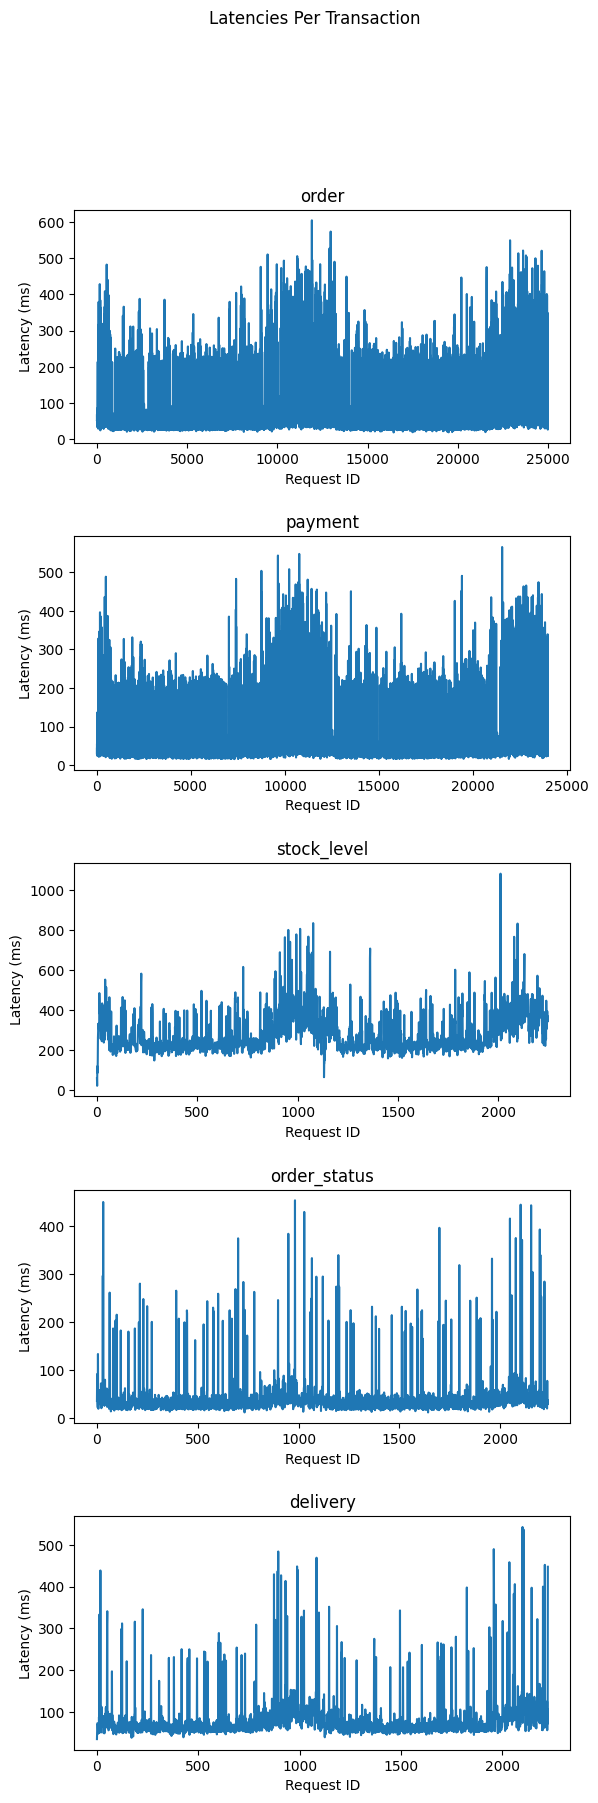

In [23]:
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('Latencies Per Transaction')
for i, key in enumerate(data):
    axes[i].plot(data[key])
    axes[i].set_title(key)
    axes[i].set_xlabel('Request ID')
    axes[i].set_ylabel('Latency (ms)')
figure.savefig(os.path.join(RESULTS_DIR, 'latency.png'))

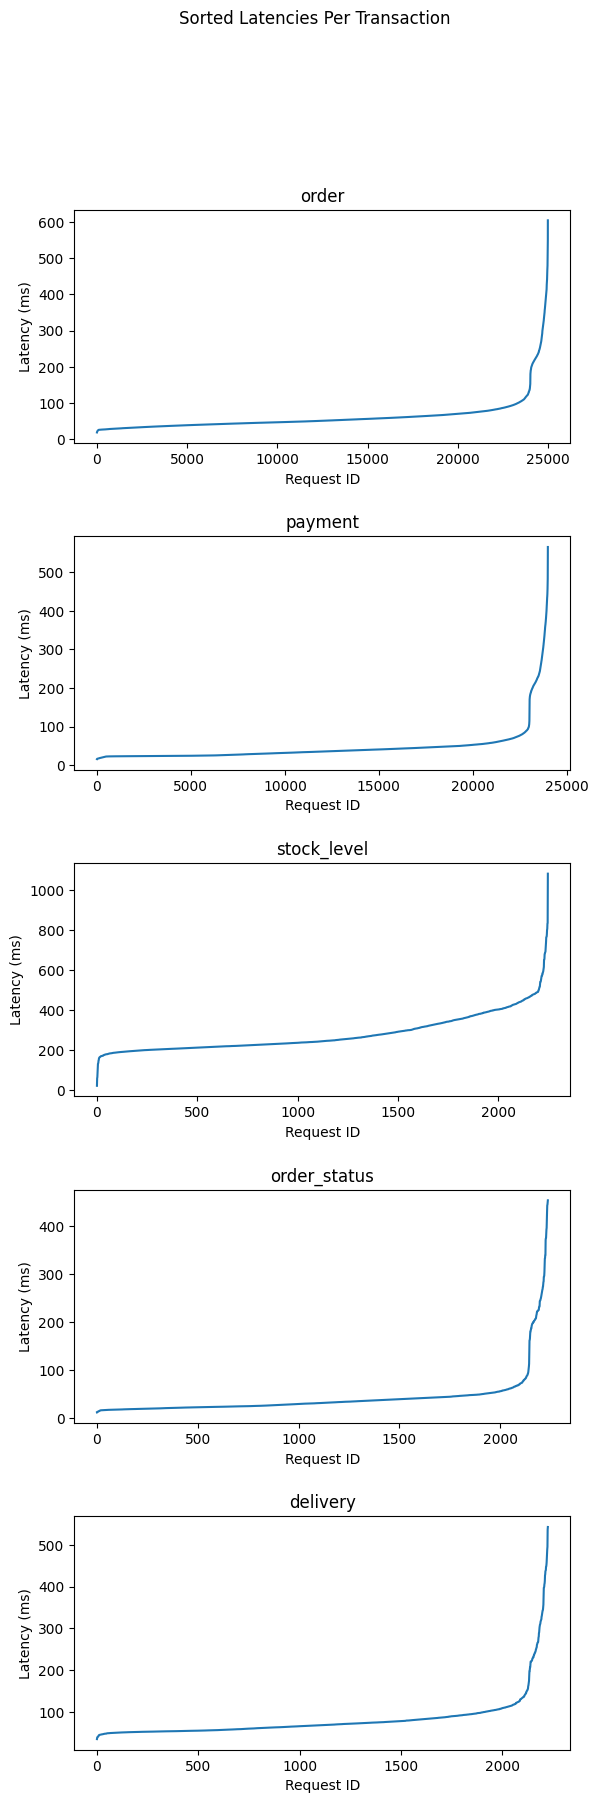

In [24]:
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('Sorted Latencies Per Transaction')
for i, key in enumerate(data):
    axes[i].plot(sorted(data[key]))
    axes[i].set_title(key)
    axes[i].set_xlabel('Request ID')
    axes[i].set_ylabel('Latency (ms)')
figure.savefig(os.path.join(RESULTS_DIR, 'sorted_latency.png'))

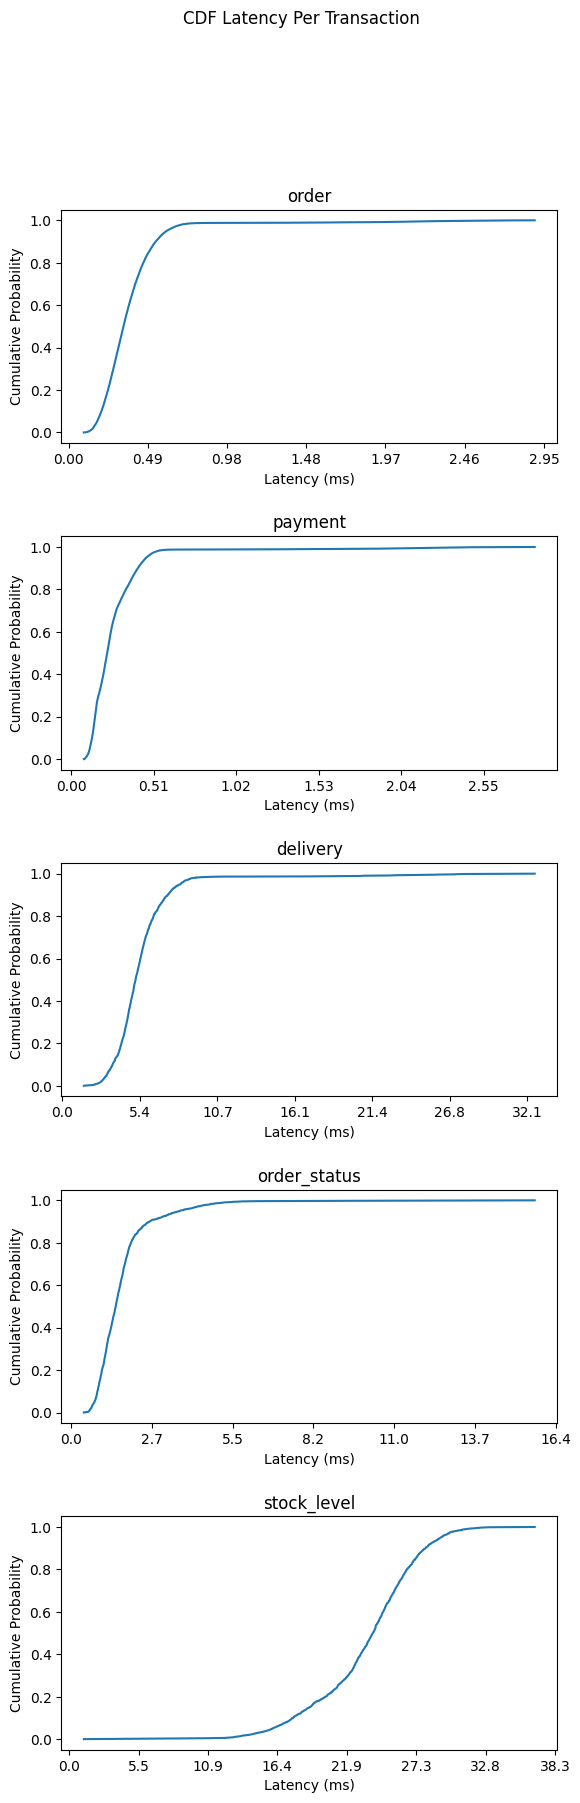

In [30]:
# Cumulative Distribution Function
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('CDF Latency Per Transaction')
for i, key in enumerate(data):
    cumsum = np.arange(1, len(data[key]) + 1) / len(data[key])
axes[i].plot(data[key], cumsum)
axes[i].set_title(key)
axes[i].set_xlabel('Latency (ms)')
axes[i].set_ylabel('Cumulative Probability')
axes[i].xaxis.set_major_formatter(mtick.PercentFormatter(len(data[key]), symbol=''))
figure.savefig(os.path.join(RESULTS_DIR, 'cdf_latency.png'))

# Metrics

In [25]:
latency_quantiles = [[key,
                      round(data[key].quantile(q=0.5), 4),
                      round(data[key].quantile(q=0.9), 4),
                      round(data[key].quantile(q=0.95), 4),
                      round(data[key].quantile(q=0.99), 4)]
                     for key in data]
df = pd.DataFrame(latency_quantiles, columns=['Transaction', 'P50', 'P90', 'P95', 'P99'])
df.to_csv(os.path.join(RESULTS_DIR, 'latency_quantiles.csv'), index=False)
df

,Transaction,P50,P90,P95,P99
0,order,51.0645,86.5769,114.8224,318.9036
1,payment,35.3034,63.3783,86.4503,307.8547
2,stock_level,244.2102,407.3262,456.7366,598.4189
3,order_status,31.2612,57.2665,81.5599,281.8941
4,delivery,67.9801,109.1859,142.3901,355.8677


In [51]:
data['payment'].describe()

count    47420.000000
mean        22.312273
std         21.792280
min          8.733273
25%         11.799037
50%         14.465570
75%         25.565982
max        159.264088
dtype: float64